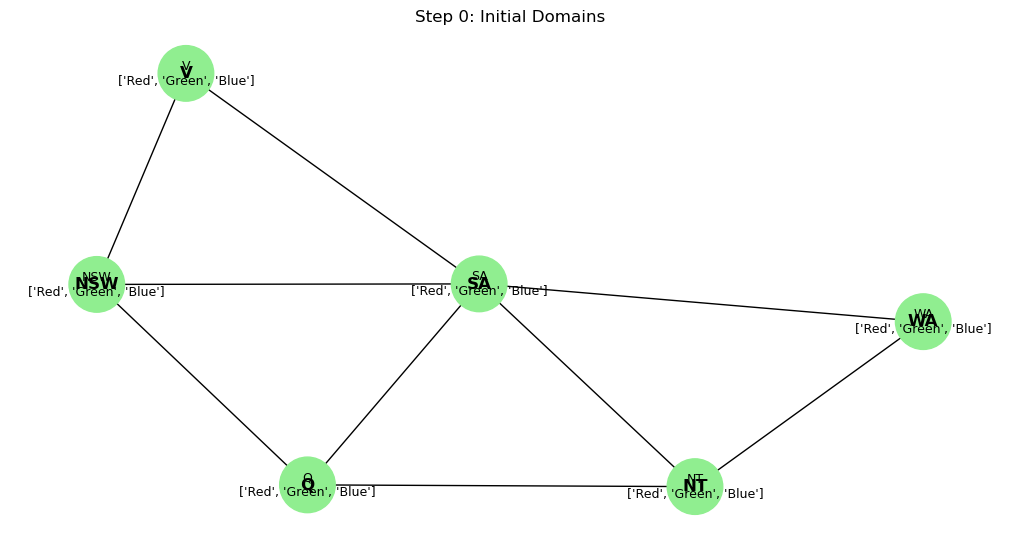

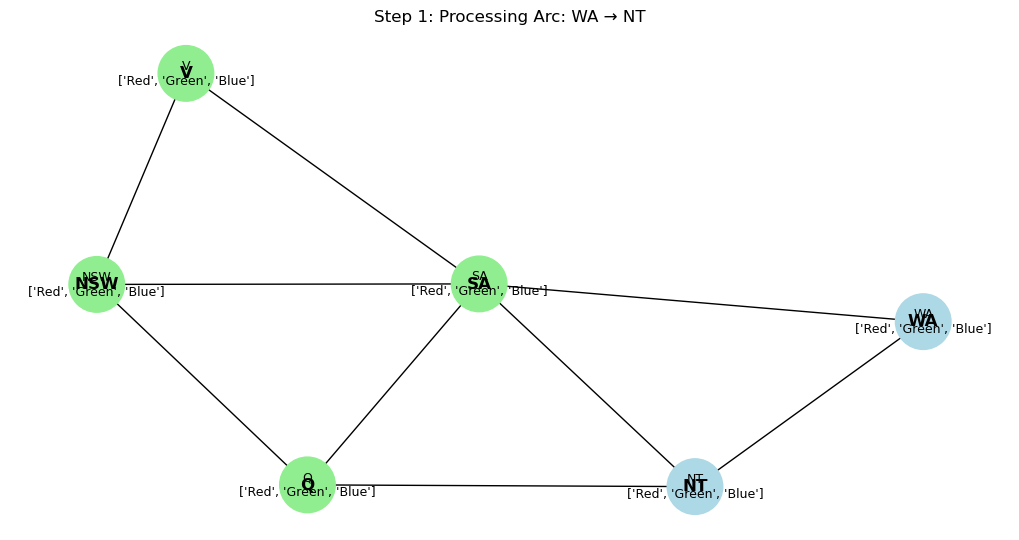

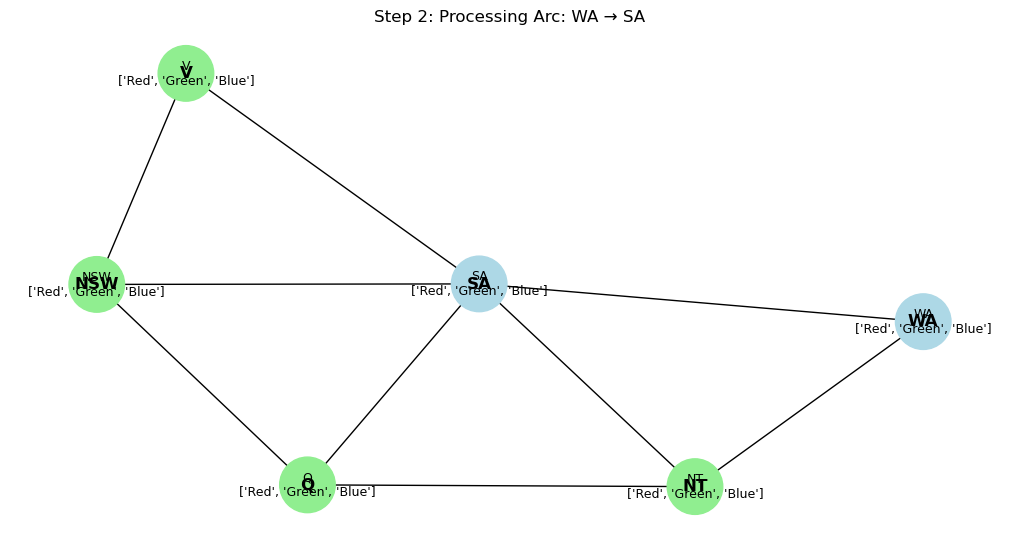

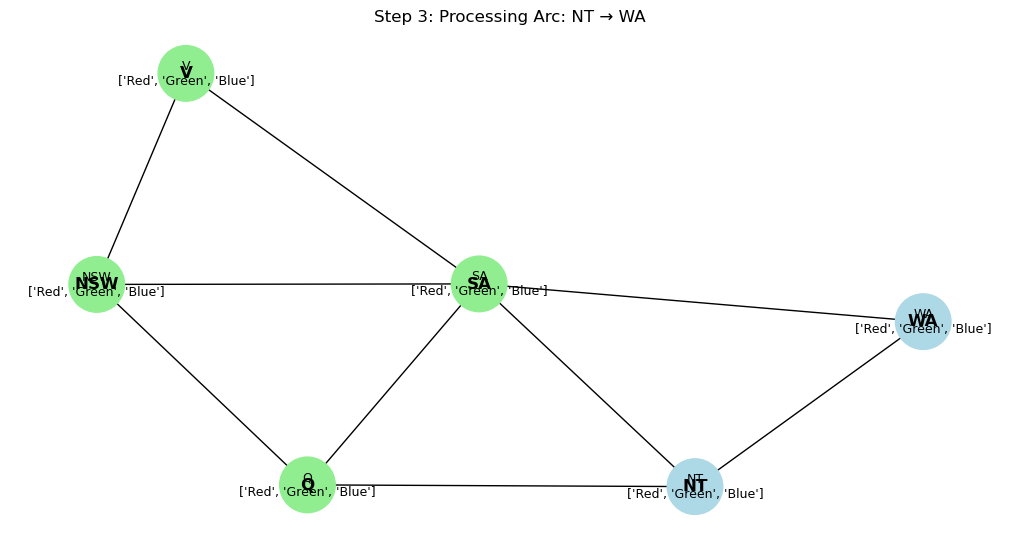

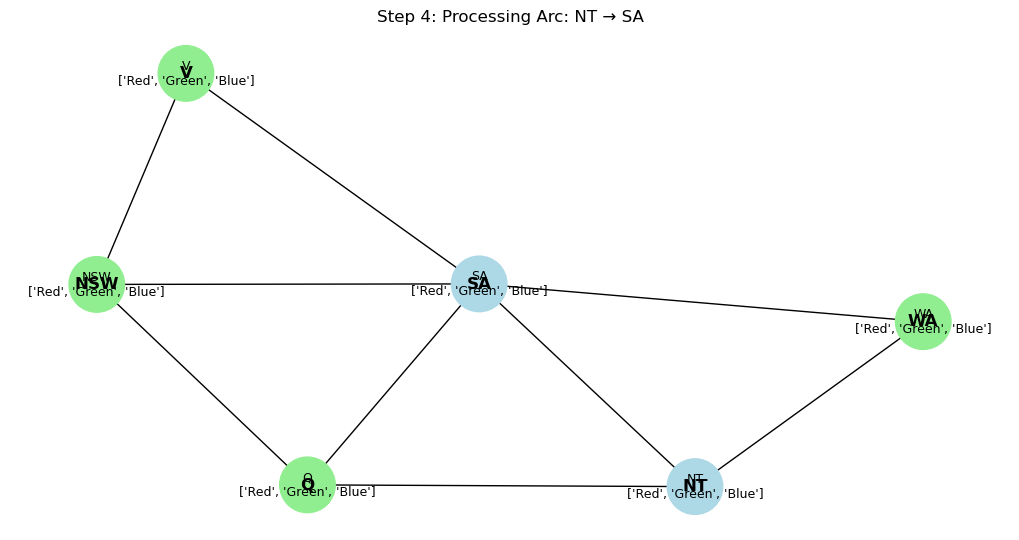

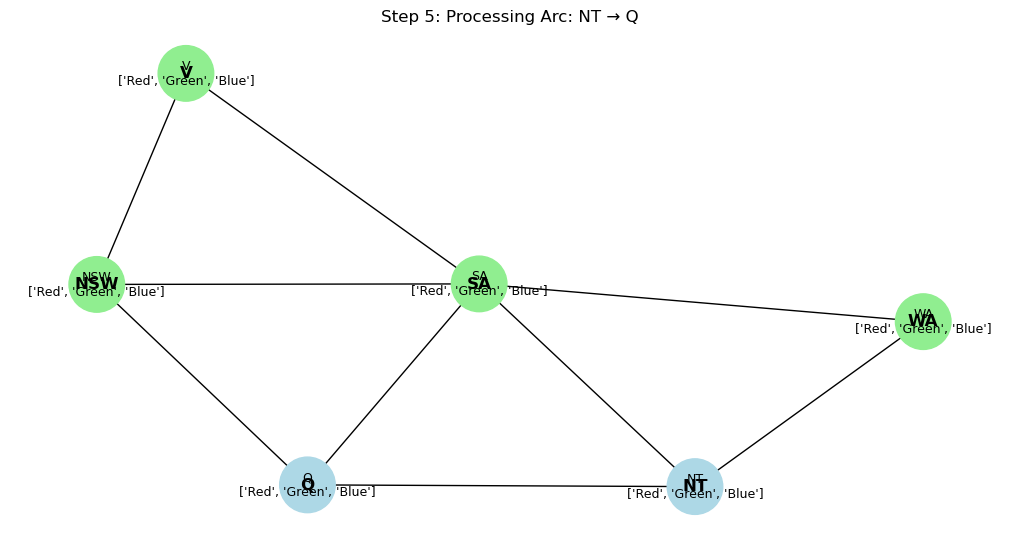

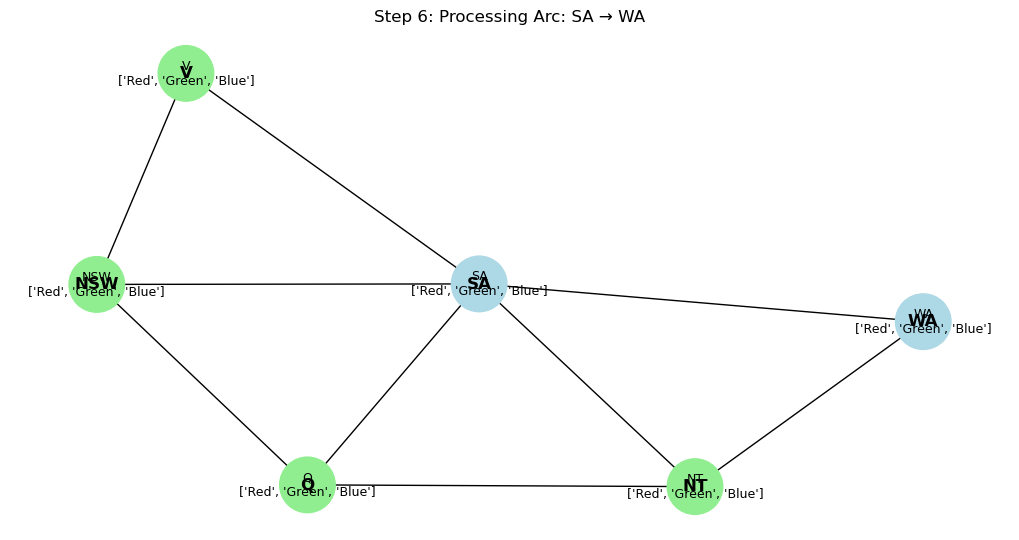

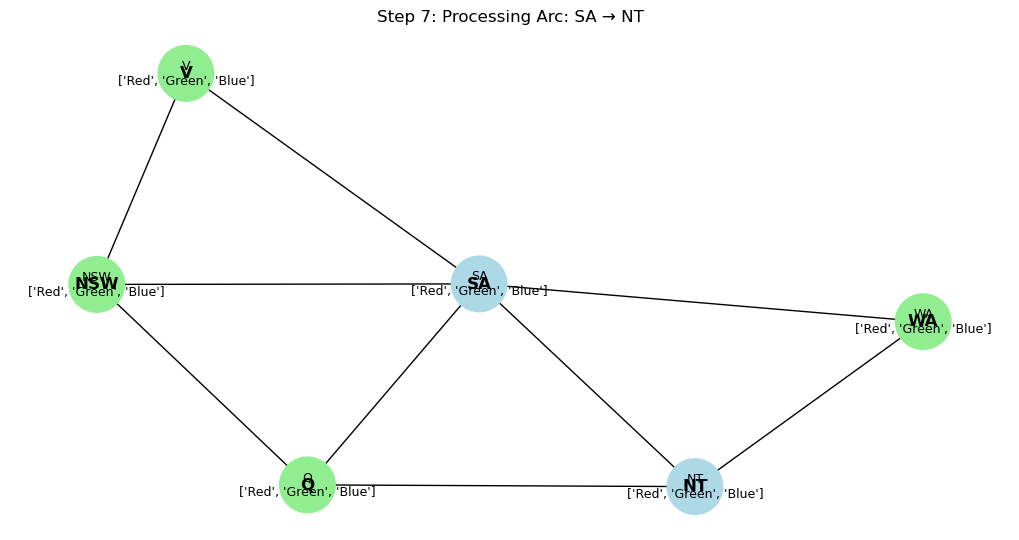

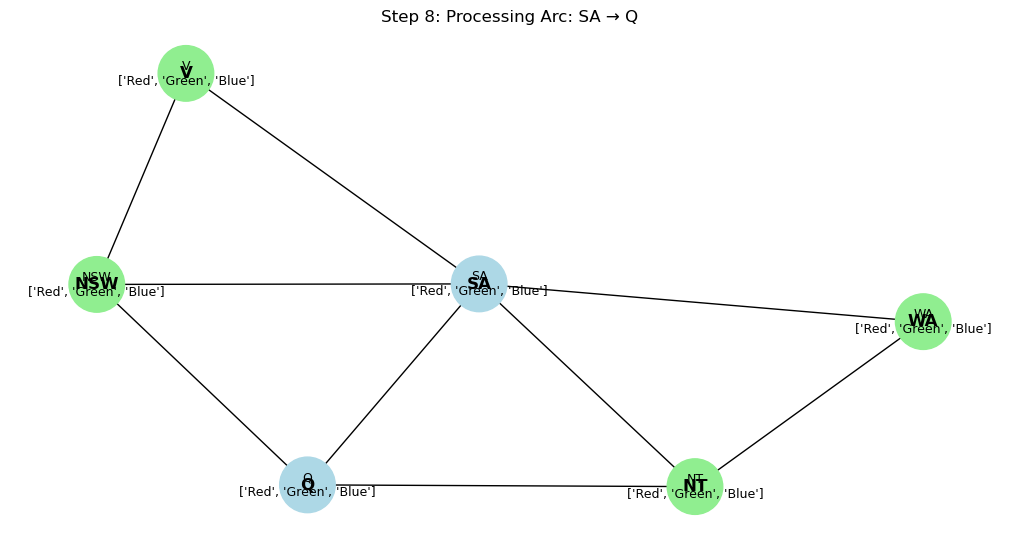

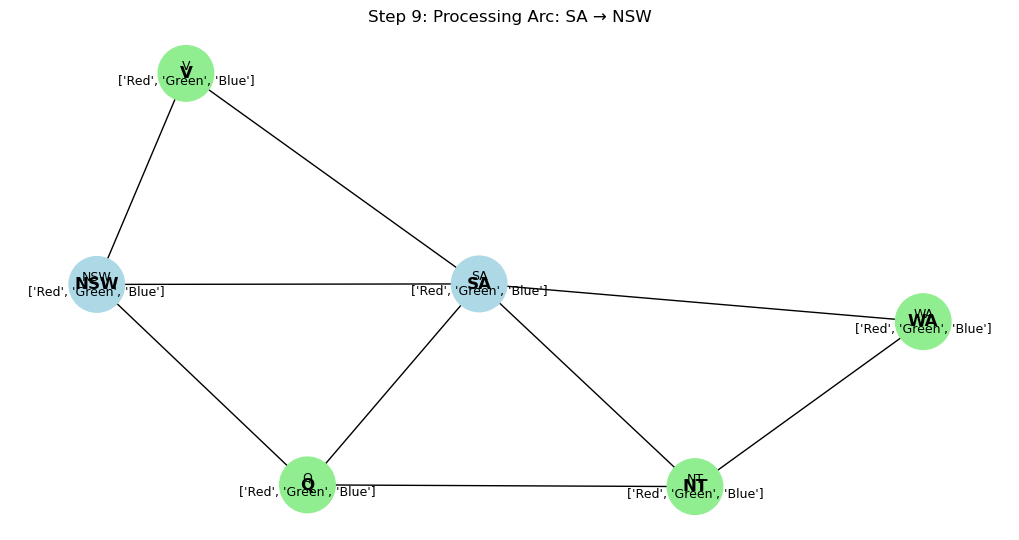

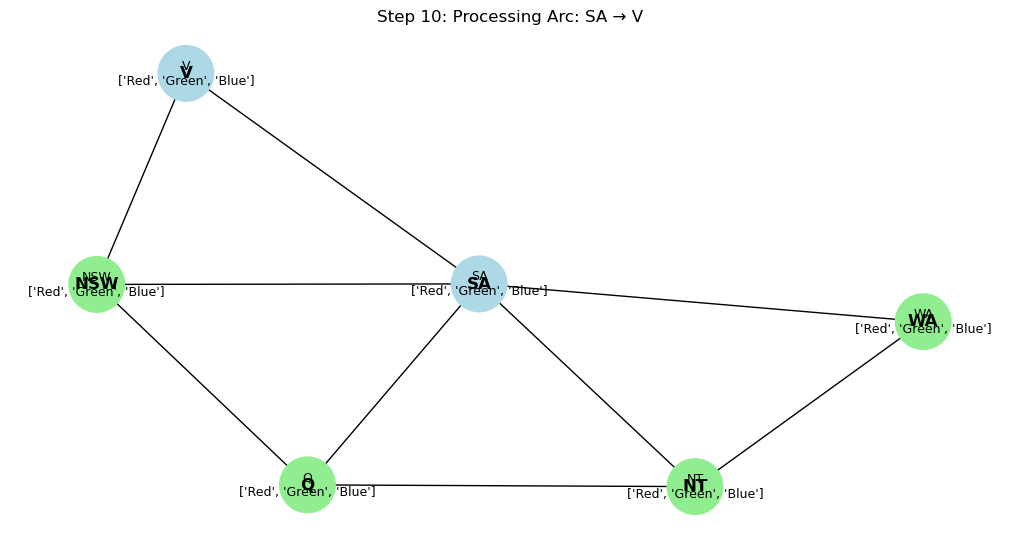

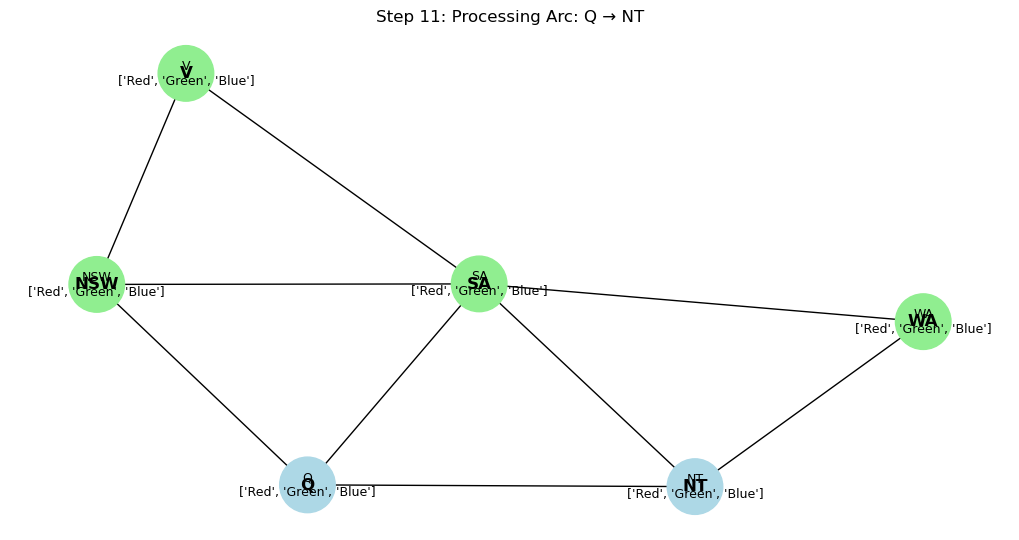

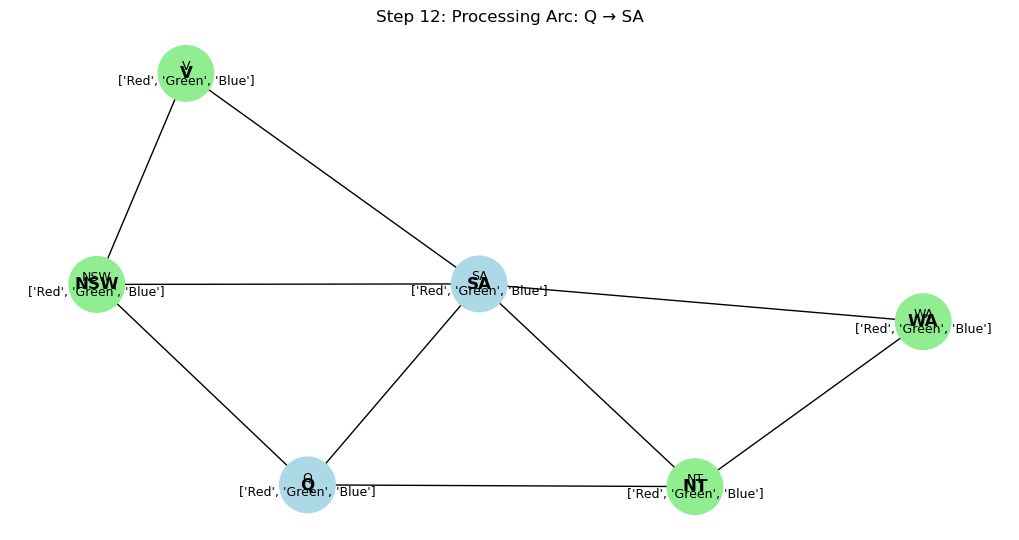

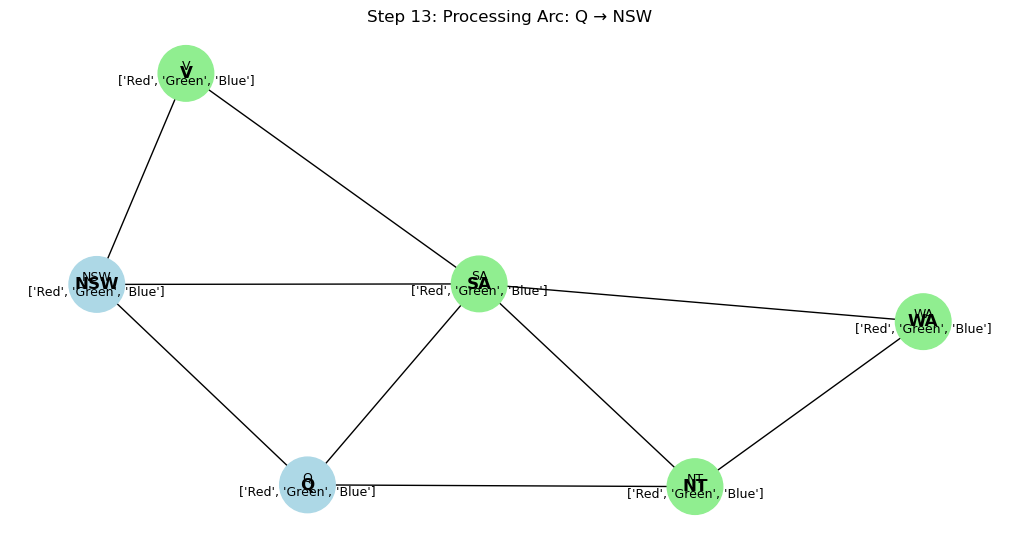

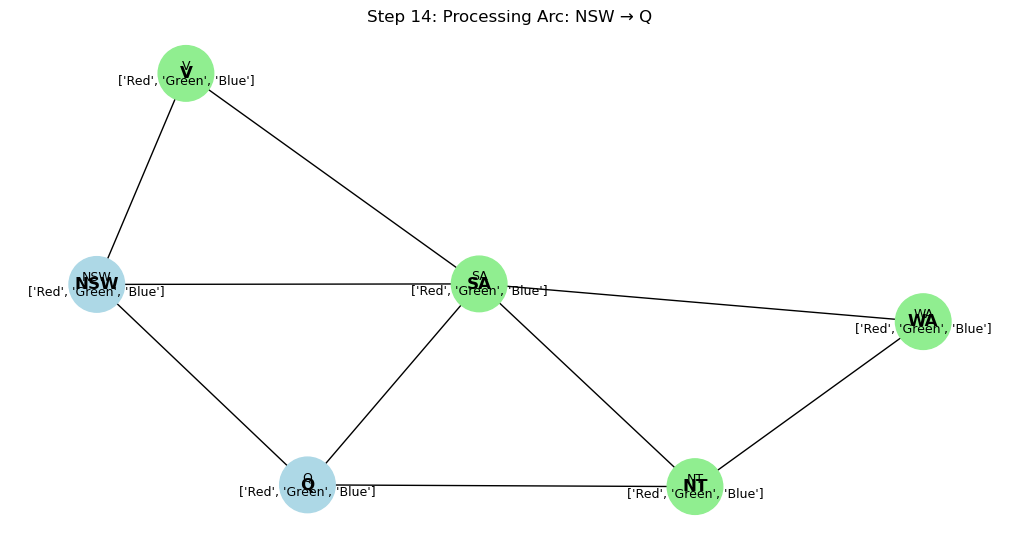

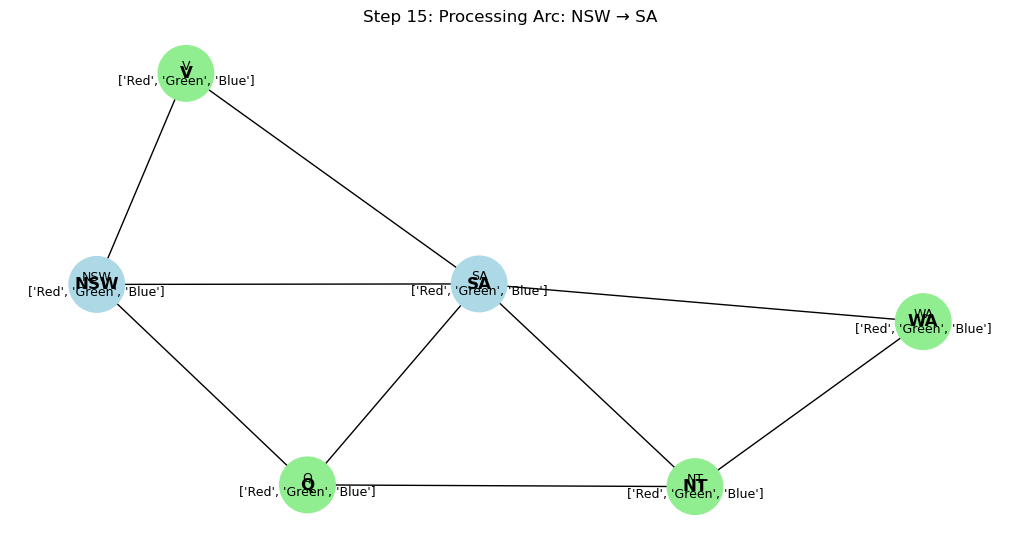

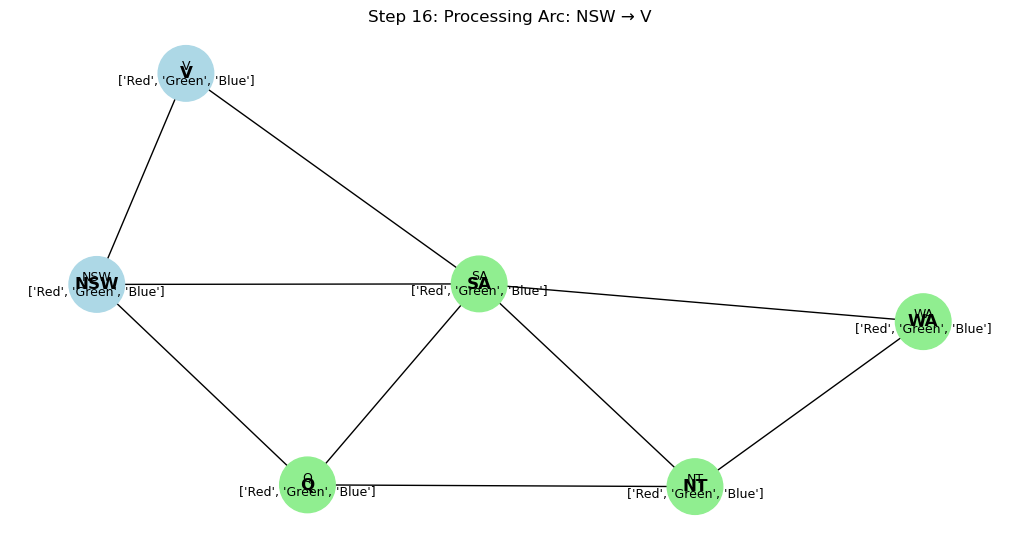

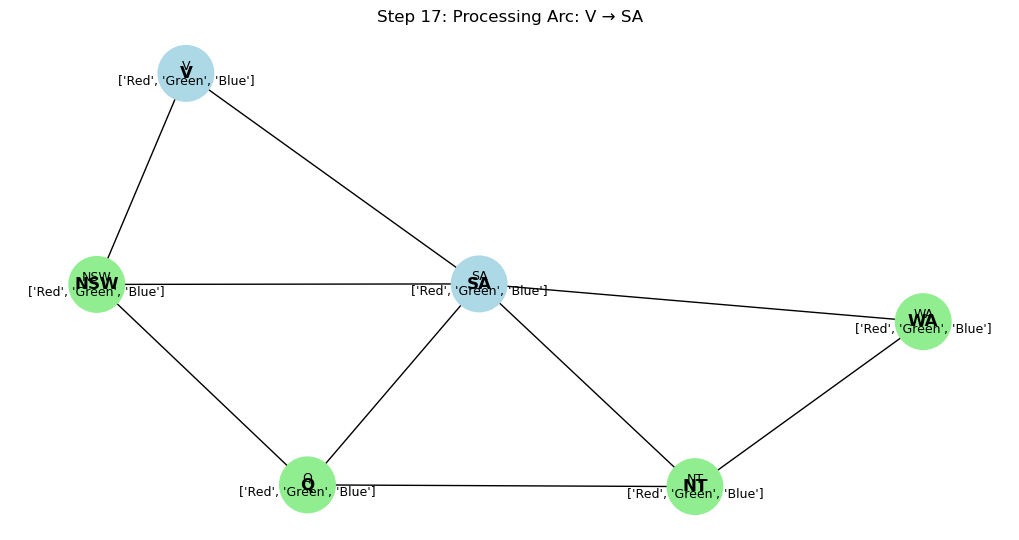

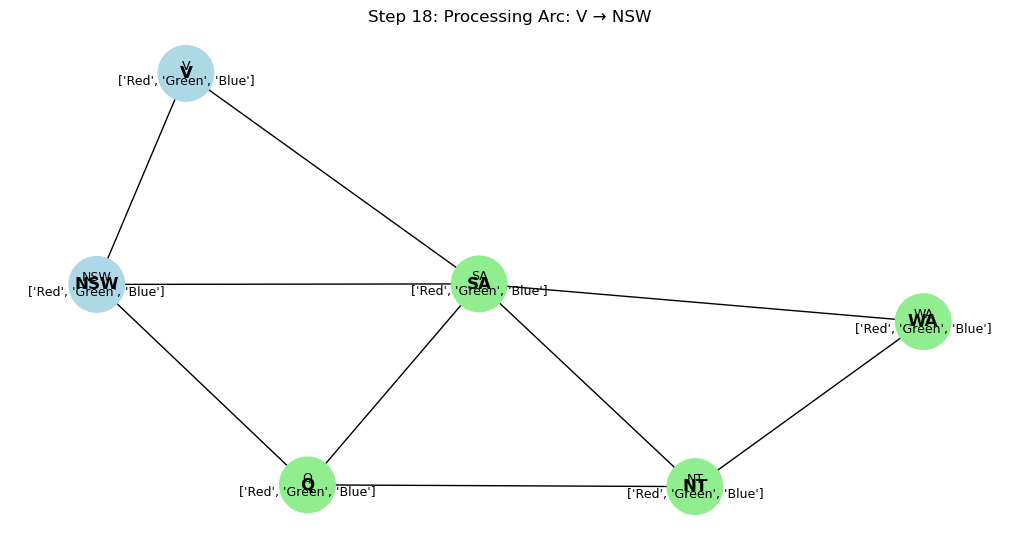

✅ Arc Consistency achieved.


True

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time

# Define regions and their adjacents
variables = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']
domains = {var: ['Red', 'Green', 'Blue'] for var in variables}
neighbors = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

# For visualization
def draw_domains(step, domains, arc=None):
    G = nx.Graph()
    for var, nbrs in neighbors.items():
        for n in nbrs:
            G.add_edge(var, n)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 5))
    node_labels = {var: f"{var}\n{domains[var]}" for var in G.nodes}
    node_colors = ['lightblue' if arc and var in arc else 'lightgreen' for var in G.nodes]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1600, font_weight='bold')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

    if arc:
        label = f"Processing Arc: {arc[0]} → {arc[1]}"
        plt.title(f"Step {step}: {label}")
    else:
        plt.title(f"Step {step}: Initial Domains")

    plt.show()
    time.sleep(0.5)

# AC-3 Algorithm
def ac3(domains):
    queue = deque([(xi, xj) for xi in variables for xj in neighbors[xi]])
    step = 0
    draw_domains(step, domains.copy())

    while queue:
        xi, xj = queue.popleft()
        step += 1
        if revise(domains, xi, xj):
            if not domains[xi]:
                print(f"❌ Domain wiped out for {xi}, no solution.")
                return False
            for xk in neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
        draw_domains(step, domains.copy(), (xi, xj))

    print("✅ Arc Consistency achieved.")
    return True

# Revise function
def revise(domains, xi, xj):
    revised = False
    for x in domains[xi][:]:  # Copy to iterate safely
        if not any(x != y for y in domains[xj]):
            domains[xi].remove(x)
            revised = True
    return revised

# Run AC-3
domains_copy = {k: v[:] for k, v in domains.items()}
ac3(domains_copy)
